In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

**Возьмем датасет с цветками iris’а (функция load_iris из библиотеки sklearn)**

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Оставим два признака - sepal_length и sepal_width и целевую переменную - variety**

In [5]:
features = df[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target

**Разделим данные на выборку для обучения и тестирования**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, variety, test_size=0.25)

**Построим модель LDA**

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучим данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,1,1
1,1,2
2,2,2
3,1,2
4,2,2
5,1,2
6,2,2
7,2,2
8,2,2
9,0,0


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

**Визуализируем предсказания для тестовой выборки и центры классов**

Text(0, 0.5, 'sepal width (cm)')

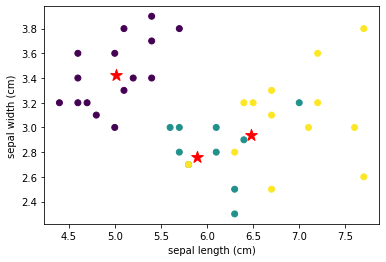

In [22]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

**Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width**

In [45]:
features.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


**Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию**

In [24]:
from sklearn.cluster import KMeans

In [30]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(features)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

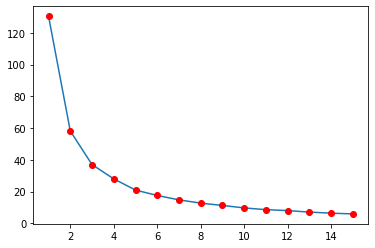

In [31]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [43]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(features)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

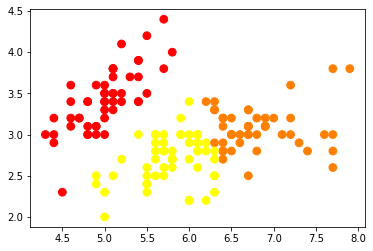

In [44]:
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

**По итогам построенной модели классификации и кластеризации хочется отметить, что вторая модель (чисто визуально) разбивает данные на кластера лучше, чем их классифицирует модель классификации**